In [ ]:
# Understand the data you are working with: Are there missing values? 
# Can they be recovered or filled easily? Can you integrate external data(e.g., hierarchical GeoHash, UberH3, or GoogleS2 encodings for spatial data) with reasonable effort?
# Can you derive additional information from the provided data (for example, from textual fields)?
# For this assignment, you can use any software/package you want

In [1]:
import pandas as pd
import numpy as np
df_tracks = pd.read_csv('output.csv')
df_artists = pd.read_csv('output2.csv')

In [5]:
#Are there any missing value?
print("df_tracks:",df_tracks.shape)
print("df_artists:", df_artists.shape)

df_tracks: (11166, 37)
df_artists: (104, 14)


In [12]:
print("df_tracks:", df_tracks.columns)
print("df_artists:", df_artists.columns)

df_tracks: Index(['id', 'id_artist', 'title', 'featured_artists', 'primary_artist',
       'language', 'album', 'swear_IT', 'swear_EN', 'swear_IT_words',
       'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens',
       'char_per_tok', 'avg_token_per_clause', 'bpm', 'rolloff', 'flux', 'rms',
       'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name',
       'album_release_date', 'album_type', 'disc_number', 'track_number',
       'duration_ms', 'explicit', 'popularity', 'id_album', 'lyrics',
       'streams@1month'],
      dtype='object')
df_artists: Index(['id_author', 'name', 'gender', 'birth_date', 'birth_place',
       'nationality', 'description', 'active_start', 'active_end', 'province',
       'region', 'country', 'latitude', 'longitude'],
      dtype='object')


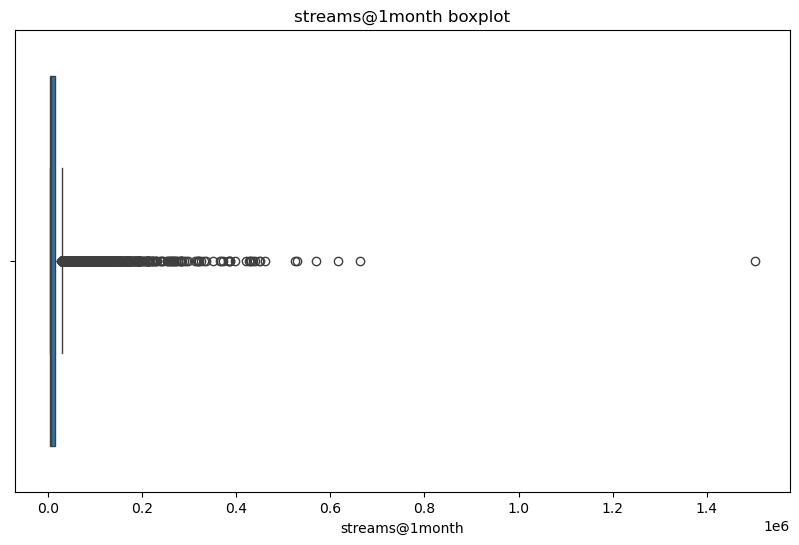

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolare Q1 e Q3
Q1 = df_tracks['streams@1month'].quantile(0.25)
Q3 = df_tracks['streams@1month'].quantile(0.75)
IQR = Q3 - Q1

# Definire limiti
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Selezionare gli outlier
outliers = df_tracks[(df_tracks['streams@1month'] < lower_bound) | (df_tracks['popularity'] > upper_bound)]

plt.figure(figsize=(10,6))
sns.boxplot(x=df_tracks['streams@1month'])
plt.title("streams@1month boxplot")
plt.show()

In [ ]:
df_tracks.info()
df_tracks.describe()

In [ ]:
df_artists.info()
df_artists.describe()

In [13]:
print("Is the id a unique indentifier for the track (in df_track): ", df_tracks['id'].is_unique)
print("Is the id_author a unique indentifier for the artist (in df_artist): ", df_artists['id_author'].is_unique)

Is the id a unique indentifier for the track (in df_track):  False
Is the id_author a unique indentifier for the artist (in df_artist):  True


In [ ]:
df_tracks.duplicated().sum()
#there are not duplicated row

np.int64(0)

In [ ]:
df_tracks[df_tracks.duplicated('id', keep=False)].sort_values(by='id')
#but the track id is not unique

In [ ]:
missing_ids = set(df_tracks['id_artist']) - set(df_artists['id_author'])
print("The id_artist an the id_author in the two tables have the following different identifier", missing_ids)
# it's an empty set so it's the same
print("Is one a subset of the other?", set(df_tracks['id_artist']).issubset(set(df_artists['id_author'])))

# merged = df_tracks.merge(df_artists, left_on='id_artist', right_on='id_author', how='left')
# merged[merged['id_author'].isna()]

The id_artist an the id_author in the two tables have the following different identifier set()
is one a subset of the other? True


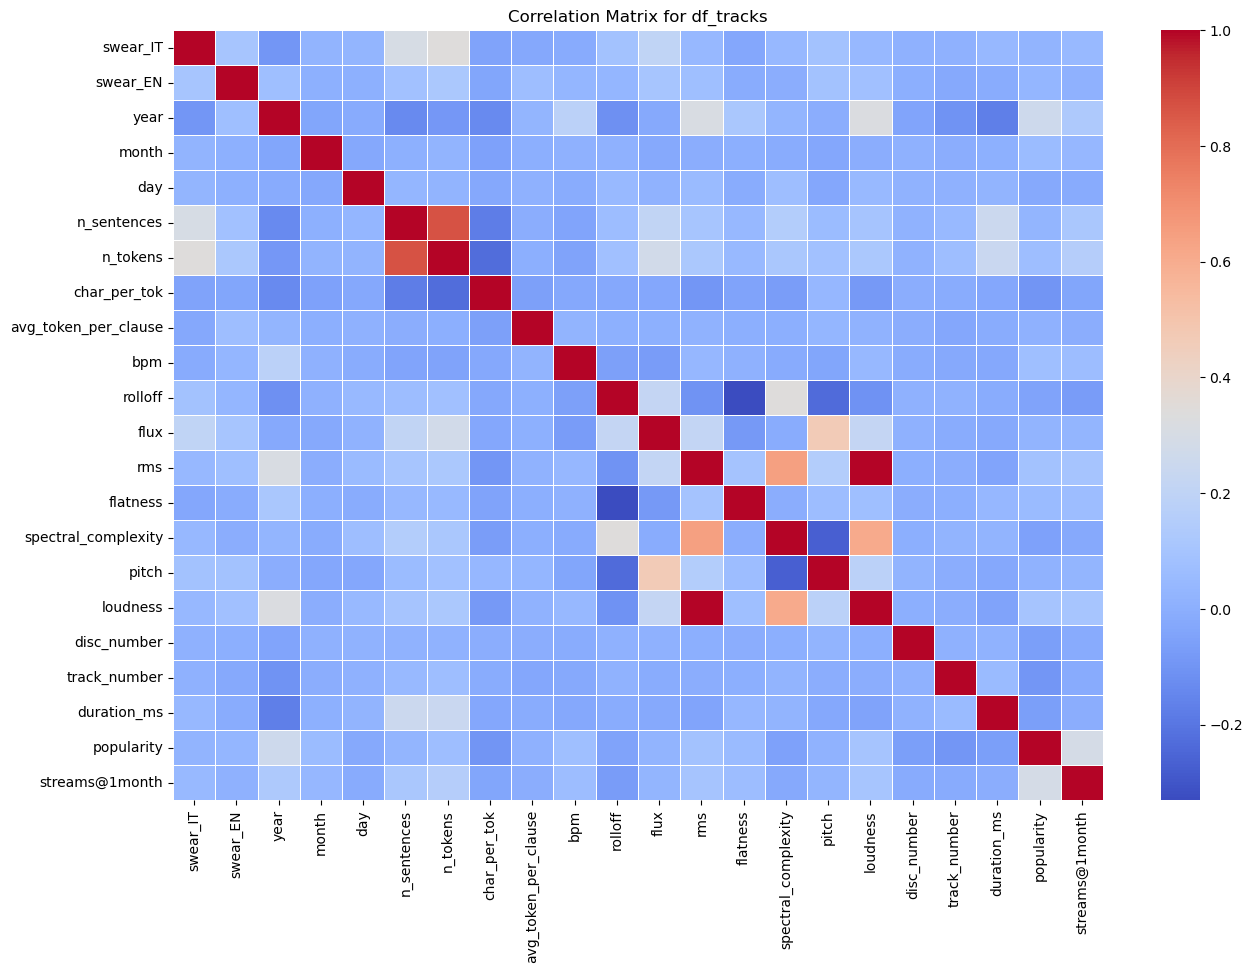

In [ ]:
corr_matrix = df_tracks.corr(numeric_only=True)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=False,           
            cmap='coolwarm', 
            linewidths=0.5)
plt.title("Correlation Matrix for df_tracks")
plt.show()


In [30]:
same_missing = (df_tracks['loudness'].isna() == df_tracks['rms'].isna()).all()
same_missing

np.True_

In [ ]:
missing_counts = df_tracks.isnull().sum() 
# print("The number of missing values is: \n",missing_counts[missing_counts > 0]) #28 columns out of 37
missing_df = missing_counts[missing_counts > 0].to_frame(name="missing_values")
print(missing_df)


                      missing_values
featured_artists                7649
language                         105
album                           1514
year                             444
month                           1197
day                             1323
n_sentences                       76
n_tokens                          76
char_per_tok                      76
avg_token_per_clause              76
bpm                               64
rolloff                           64
flux                              64
rms                               64
flatness                          64
spectral_complexity               64
pitch                             64
loudness                          64
album_name                        78
album_release_date                78
album_type                        78
disc_number                       78
track_number                      78
duration_ms                       78
explicit                          78
popularity                        78
i

In [60]:
df_tracks['lyrics'][0]

'Oplà, ah\nBdope, chiama due b—\n\nMi candiderei come presidente\nNascevo in America, ero Franco West (Ah-ah)\nRosa è il sesso come un ditalino\nQuesta si fa il tipo mentre pensa a me (Ah-ah)\nTutto duro come un palo (La)\nChiede a cosa penso mentre chiavo (La)\nPenso a Pupo con due fiche in mano (La)\nSono così fiero di essere italiano (Uh)\nEsce il tuo singolo e ronf (Ronf)\nSei la strada, the real Tom (Tom)\nDice che vuole il ragazzo sporco (Ah)\nLa sbatto col cazzo che sa di tonno (Ah)\nPesto merda, penso: "Vedi? (Ecco)\nAnche oggi un nemico tra i piedi" (Che cazzo)\nEntro in ufficio coi debiti\nEsco e non so come spenderli (Tu-tu)\nFanculo Marco Mengo**, fuck (Fuck)\nMi sta sui coglioni la scena rap (Sulla minchia)\nA saperlo prima di fare trap (Ah)\nRestavo in cantina a fumare cra**\nIl-Il più politically scorretto (Yeah)\nLe ho lasciato minchia sopra il rossetto (Proprio io)\nChe asciugo che mi fai sentire il pezzo (Che palle)\nNel prossimo zitto che suona meglio\nAh, shazammo m

In [ ]:

#1. explicit is a true/false value so it can be retrived from "swear_IT" and "swear_EN" --> if either one of thm is >0 then is TRUE otherwise it is FALSE
#2. lyrics: remove the corresponding row
#3. loudness e rms have correlotion 1 and the missing value correspond to the same rows --> We can remove the loudness column to avoid reduntant information
#4. n_sentences, n_tokens,char_per_tok, avg_token_per_clause --> derive them from the lyrics
#popularity: it is a value from 1 to 100 so we can train a regression model using the othe can be retrived from streams@1month, we can decide a trashhold
#5. language can be retrived from lyrics --> we cannot use pandas so we can try to use some standard common word in italian and english and classify the missing rows

In [53]:
df_tracks['language'].unique()

array(['pl', 'en', 'it', 'fr', nan, 'eu', 'sco', 'co', 'da', 'nl', 'et',
       'pt', 'es', 'war', 'lt', 'ia', 'de', 'cs', 'gl', 'sr', 'rw', 'ca',
       'ro', 'no', 'aa', 'chr', 'rm', 'ru', 'mt', 'qu', 'cy', 'eo', 'bg',
       'la', 'sq', 'sw'], dtype=object)

In [24]:
print("The columns without missing values are: \n", missing_counts[missing_counts == 0])

The columns without missing values are: 
 id                0
id_artist         0
title             0
primary_artist    0
swear_IT          0
swear_EN          0
swear_IT_words    0
swear_EN_words    0
streams@1month    0
dtype: int64


In [ ]:
# df_artistsPD = pd.DataFrame(df_artists)

# Check for duplicates in the 'title' column
duplicates_exist = df_tracks['title'].duplicated().any()

if duplicates_exist:
    print("There are duplicate titles in the column 'title'.")
else:
    print("All titles are unique.")

# Count occurrences of each title
title_counts = df_tracks['title'].value_counts()
duplicates = title_counts[title_counts > 1]
print("\nDuplicated titles and their counts:")
print(duplicates)


There are duplicate titles in the column 'title'.

Duplicated titles and their counts:
title
Intro                   36
Outro                   11
Freestyle                8
64 Bars                  7
One Take FM Free Mic     7
                        ..
Cicatrici                2
Superstar                2
Senza Dio                2
SLIME                    2
PARADISO                 2
Name: count, Length: 456, dtype: int64


In [32]:
missing_counts1 = df_artists.isnull().sum() 
# print("The number of missing values is: \n",missing_counts[missing_counts > 0]) #28 columns out of 37
missing_df1 = missing_counts1[missing_counts1 > 0].to_frame(name="missing_values")
print(missing_df1)

              missing_values
birth_date                31
birth_place               32
nationality               33
description               18
active_start              54
active_end               104
province                  34
region                    36
country                   34
latitude                  32
longitude                 32


In [33]:
print("The columns without missing values are: \n", missing_counts1[missing_counts1 == 0])

The columns without missing values are: 
 id_author    0
name         0
gender       0
dtype: int64


In [ ]:
#we can perform a lowercasing on the description and defined keywords and have the nationality
# where we have latitude and longitude we have all the rest 

In [34]:
import requests
import time

def search_artist_musicbrainz(name):
    url = "https://musicbrainz.org/ws/2/artist/"
    params = {
        "query": name,
        "fmt": "json",
        "limit": 1
    }
    headers = {"User-Agent": "MyApp/1.0 (email@example.com)"}
    r = requests.get(url, params=params, headers=headers)
    if r.status_code != 200:
        return None
    data = r.json()
    if "artists" not in data or len(data["artists"]) == 0:
        return None
    artist_info = data["artists"][0]
    return {
        "name": artist_info.get("name"),
        "birth_date": artist_info.get("life-span", {}).get("begin"),
        "active_start": artist_info.get("life-span", {}).get("begin"),
        "active_end": artist_info.get("life-span", {}).get("end"),
        "country": artist_info.get("area", {}).get("name")
    }

# Esempio
artist_data = search_artist_musicbrainz("Laura Pausini")
print(artist_data)
time.sleep(1)  # evitare rate limit


{'name': 'Laura Pausini', 'birth_date': '1974-05-16', 'active_start': '1974-05-16', 'active_end': None, 'country': 'Italy'}


In [37]:
import csv

# Leggi il CSV e crea una lista di dizionari
df_artists = []
with open("output2.csv", "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        # converte valori numerici da stringa a float se necessario
        row["latitude"] = float(row["latitude"]) if row["latitude"] else 0
        row["longitude"] = float(row["longitude"]) if row["longitude"] else 0
        df_artists.append(row)

# Stampa le prime 5 righe per vedere com'è fatto
for artist in df_artists[:5]:
    print(artist)


{'id_author': 'ART82291002', 'name': '99 posse', 'gender': 'M', 'birth_date': '', 'birth_place': '', 'nationality': '', 'description': 'gruppo musicale italiano', 'active_start': '1991-01-01', 'active_end': '', 'province': '', 'region': '', 'country': '', 'latitude': 0, 'longitude': 0}
{'id_author': 'ART53496045', 'name': 'achille lauro', 'gender': 'M', 'birth_date': '1990-07-11', 'birth_place': 'Verona', 'nationality': 'Italia', 'description': 'cantautore e rapper italiano (1990-)', 'active_start': '2012-01-01', 'active_end': '', 'province': 'Verona', 'region': 'Veneto', 'country': 'Italia', 'latitude': 45.4424977, 'longitude': 10.9857377}
{'id_author': 'ART18853907', 'name': 'alfa', 'gender': 'M', 'birth_date': '', 'birth_place': '', 'nationality': '', 'description': '', 'active_start': '', 'active_end': '', 'province': '', 'region': '', 'country': '', 'latitude': 0, 'longitude': 0}
{'id_author': 'ART64265460', 'name': 'anna pepe', 'gender': 'F', 'birth_date': '', 'birth_place': '', 

In [38]:
artists_missing_coords = [artist for artist in df_artists if artist["latitude"] == 0 or artist["longitude"] == 0]
print(f"Artisti senza lat/lon: {len(artists_missing_coords)}")


Artisti senza lat/lon: 32


In [40]:
for artist in df_artists:
    print(artist["name"], artist["latitude"], artist["longitude"])


99 posse 0 0
achille lauro 45.4424977 10.9857377
alfa 0 0
anna pepe 0 0
articolo 31 0 0
babaman 45.528878 9.04156
baby k 45.0806268 7.6707168
bassi maestro 45.4641943 9.1896346
beba 0 0
bigmama 0 0
brusco 0 0
bushwaka 0 0
caneda 0 0
caparezza 40.222125 18.225226
capo plaza 40.4194416 15.3106085
chadia rodriguez 44.4194958 8.9234821
clementino 40.9965446 15.140569
club dogo 0 0
coez 40.7472133 14.6433202
colle der fomento 0 0
cor veleno 0 0
dani faiv 44.238366 9.6912326
dargen d_amico 0 0
dark polo gang 0 0
doll kill 0 0
don joe 45.4641943 9.1896346
drefgold 44.4938203 11.3426327
emis killa 45.6139627 9.37006
ensi 45.0957237 7.5254027
entics 45.4641943 9.1896346
ernia 45.4641943 9.1896346
eva rea 0 0
fabri fibra 43.7149517 13.2179488
fedez 45.4641943 9.1896346
frah quintale 45.7795804 10.425873
frankie hi-nrg mc 45.0677551 7.6824892
fred de palma 45.0677551 7.6824892
gemitaiz 41.8933203 12.4829321
geolier 40.8358846 14.2487679
ghali 45.4641943 9.1896346
ghemon 40.9965446 15.140569
grido

In [42]:
import requests
import time

# ----------------------------
# Funzione per cercare artista su MusicBrainz
# ----------------------------
def search_artist_musicbrainz(name):
    """
    Cerca un artista su MusicBrainz usando il nome.
    Restituisce un dizionario con eventuali dati disponibili: birth_place, country, birth_date, active_start, active_end
    """
    url = "https://musicbrainz.org/ws/2/artist/"
    params = {
        "query": name,
        "fmt": "json",
        "limit": 1
    }
    headers = {"User-Agent": "MyApp/1.0 (email@example.com)"}
    
    try:
        r = requests.get(url, params=params, headers=headers)
        r.raise_for_status()
    except:
        return None
    
    data = r.json()
    if "artists" not in data or len(data["artists"]) == 0:
        return None
    
    artist_info = data["artists"][0]
    result = {
        "birth_place": None,
        "country": None,
        "birth_date": artist_info.get("life-span", {}).get("begin"),
        "active_start": artist_info.get("life-span", {}).get("begin"),
        "active_end": artist_info.get("life-span", {}).get("end")
    }
    # MusicBrainz fornisce l'area (paese) dell'artista
    if "area" in artist_info:
        result["country"] = artist_info["area"].get("name")
    return result

# ----------------------------
# Funzione per cercare pagina Wikipedia e ottenere città/paese
# ----------------------------
def search_artist_wikipedia(name):
    """
    Cerca la pagina Wikipedia dell'artista e prova a estrarre il paese.
    Restituisce un dizionario con eventuali dati.
    """
    url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{name.replace(' ', '_')}"
    headers = {"User-Agent": "MyApp/1.0 (email@example.com)"}
    
    try:
        r = requests.get(url, headers=headers)
        r.raise_for_status()
    except:
        return None
    
    data = r.json()
    if "description" in data:
        desc = data["description"].lower()
        country = None
        if "italian" in desc:
            country = "Italia"
        elif "american" in desc:
            country = "USA"
        # aggiungi altri casi se vuoi
        return {"country": country}
    return None

# ----------------------------
# Funzione per geocoding
# ----------------------------
def geocode_place(place_name, country_name=None):
    query = place_name
    if country_name:
        query += f", {country_name}"
    url = "https://nominatim.openstreetmap.org/search"
    params = {"q": query, "format": "json", "limit": 1}
    headers = {"User-Agent": "Mozilla/5.0"}
    
    try:
        r = requests.get(url, params=params, headers=headers)
        r.raise_for_status()
    except:
        return None, None
    
    data = r.json()
    if len(data) == 0:
        return None, None
    return float(data[0]["lat"]), float(data[0]["lon"])

# ----------------------------
# Aggiorna gli artisti senza lat/lon
# ----------------------------
for artist in df_artists:
    if artist["latitude"] == 0 or artist["longitude"] == 0:
        print(f"Elaboro: {artist['name']}")
        
        # 1️⃣ Prova da MusicBrainz
        info = search_artist_musicbrainz(artist["name"])
        time.sleep(1)
        if info:
            artist["birth_place"] = info.get("birth_place") or artist.get("birth_place")
            artist["country"] = info.get("country") or artist.get("country")
            artist["birth_date"] = info.get("birth_date") or artist.get("birth_date")
            artist["active_start"] = info.get("active_start") or artist.get("active_start")
            artist["active_end"] = info.get("active_end") or artist.get("active_end")
        
        # 2️⃣ Se ancora mancante, prova da Wikipedia
        if not artist.get("country"):
            wiki_info = search_artist_wikipedia(artist["name"])
            time.sleep(1)
            if wiki_info and wiki_info.get("country"):
                artist["country"] = wiki_info["country"]
        
        # 3️⃣ Geocoding se abbiamo almeno birth_place o country
        place = artist.get("birth_place") or artist.get("country")
        country = artist.get("country") if artist.get("birth_place") else None
        if place:
            lat, lon = geocode_place(place, country)
            if lat is not None and lon is not None:
                artist["latitude"] = lat
                artist["longitude"] = lon
            time.sleep(1)

# ----------------------------
# Controllo finale
# ----------------------------
for artist in df_artists:
    print(artist["name"], artist["birth_place"], artist["country"], artist["latitude"], artist["longitude"])


Elaboro: 99 posse
Elaboro: alfa
Elaboro: anna pepe
Elaboro: articolo 31
Elaboro: beba
Elaboro: bigmama
Elaboro: brusco
Elaboro: bushwaka
Elaboro: caneda
Elaboro: club dogo
Elaboro: colle der fomento
Elaboro: cor veleno
Elaboro: dargen d_amico
Elaboro: dark polo gang
Elaboro: doll kill
Elaboro: eva rea
Elaboro: guè pequeno
Elaboro: hindaco
Elaboro: joey funboy
Elaboro: johnny marsiglia
Elaboro: mike24
Elaboro: miss keta
Elaboro: miss simpatia
Elaboro: mistico
Elaboro: nerone
Elaboro: o zulù
Elaboro: priestess
Elaboro: samuel heron
Elaboro: shiva
Elaboro: skioffi
Elaboro: sottotono
Elaboro: yeиdry
99 posse  Italy 42.6384261 12.674297
achille lauro Verona Italia 45.4424977 10.9857377
alfa  Genova 44.40726 8.9338624
anna pepe  Italy 42.6384261 12.674297
articolo 31  Italy 42.6384261 12.674297
babaman Rho Italia 45.528878 9.04156
baby k Singapore  45.0806268 7.6707168
bassi maestro Milano Italia 45.4641943 9.1896346
beba   0 0
bigmama  Japan 36.5748441 139.2394179
brusco  Italy 42.6384261 1

In [43]:
for artist in df_artists:
    if artist["latitude"] == 0 or artist["longitude"] == 0:
        print(
            artist["name"],
            artist.get("birth_place", ""),
            artist.get("country", ""),
            artist.get("latitude", 0),
            artist.get("longitude", 0)
        )


beba   0 0
bushwaka   0 0
hindaco   0 0
joey funboy   0 0
mike24   0 0
miss simpatia   0 0
